In [19]:
import numpy as np
import matplotlib.pyplot as plt

import oracles
from oracles import create_log_reg_oracle
from optimization import gradient_descent, newton

In [20]:
!wget https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/w8a
!wget https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/gisette_scale.bz2
!wget https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/real-sim.bz2
!wget https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/news20.binary.bz2
!wget https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/rcv1_train.binary.bz2
!bzip2 -d gisette_scale.bz2
!bzip2 -d real-sim.bz2
!bzip2 -d news20.binary.bz2
!bzip2 -d rcv1_train.binary.bz2

--2022-03-01 01:30:52--  https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/w8a
Resolving www.csie.ntu.edu.tw (www.csie.ntu.edu.tw)... 140.112.30.26
Connecting to www.csie.ntu.edu.tw (www.csie.ntu.edu.tw)|140.112.30.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3478238 (3.3M)
Saving to: ‘w8a.1’

w8a.1               100%[===================>]   3.32M  3.41MB/s    in 1.0s    

2022-03-01 01:30:54 (3.41 MB/s) - ‘w8a.1’ saved [3478238/3478238]

--2022-03-01 01:30:54--  https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/gisette_scale.bz2
Resolving www.csie.ntu.edu.tw (www.csie.ntu.edu.tw)... 140.112.30.26
Connecting to www.csie.ntu.edu.tw (www.csie.ntu.edu.tw)|140.112.30.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21902461 (21M) [application/x-bzip2]
Saving to: ‘gisette_scale.bz2’

gisette_scale.bz2   100%[===================>]  20.89M  10.9MB/s    in 1.9s    

2022-03-01 01:30:56 (10.9 MB/s) - ‘gisette_

In [7]:
from joblib import Memory
from sklearn.datasets import load_svmlight_file
mem = Memory("./mycache")

data = ["w8a", "gisette_scale", "real-sim", "news20.binary", "rcv1_train.binary"]

@mem.cache
def get_data(name):
    data = load_svmlight_file(name)
    return data[0], data[1]

for d in data:
    X, y = get_data(d)
    display(X)

________________________________________________________________________________
[Memory] Calling __main__--content-<ipython-input-b37b6b632cf0>.get_data...
get_data('w8a')
_________________________________________________________get_data - 0.3s, 0.0min


<49749x300 sparse matrix of type '<class 'numpy.float64'>'
	with 579586 stored elements in Compressed Sparse Row format>

________________________________________________________________________________
[Memory] Calling __main__--content-<ipython-input-b37b6b632cf0>.get_data...
get_data('gisette_scale')
________________________________________________________get_data - 17.3s, 0.3min


<6000x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 29729997 stored elements in Compressed Sparse Row format>

________________________________________________________________________________
[Memory] Calling __main__--content-<ipython-input-b37b6b632cf0>.get_data...
get_data('real-sim')
_________________________________________________________get_data - 3.3s, 0.1min


<72309x20958 sparse matrix of type '<class 'numpy.float64'>'
	with 3709083 stored elements in Compressed Sparse Row format>

________________________________________________________________________________
[Memory] Calling __main__--content-<ipython-input-b37b6b632cf0>.get_data...
get_data('news20.binary')
_________________________________________________________get_data - 6.1s, 0.1min


<19996x1355191 sparse matrix of type '<class 'numpy.float64'>'
	with 9097916 stored elements in Compressed Sparse Row format>

________________________________________________________________________________
[Memory] Calling __main__--content-<ipython-input-b37b6b632cf0>.get_data...
get_data('rcv1_train.binary')
_________________________________________________________get_data - 1.1s, 0.0min


<20242x47236 sparse matrix of type '<class 'numpy.float64'>'
	with 1498952 stored elements in Compressed Sparse Row format>

In [8]:
from sklearn.model_selection import train_test_split

X, y = get_data("w8a")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=41)

In [22]:
epsilons = [1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8]
error1 = []
x0 = np.zeros(X_train.shape[1])
l = 1. / X_train.shape[1]
oracle = create_log_reg_oracle(X_train, y_train, l)
for epsilon in epsilons:
  x_opt, message, history = newton(oracle, x0, tolerance=epsilon, trace=True)
  b_test_hat = np.sign(X_test.dot(x_opt))
  error1.append(np.mean(b_test_hat != y_test))

In [16]:
X, y = get_data("gisette_scale")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=41)

In [17]:
error2 = []
x0 = np.zeros(X_train.shape[1])
l = 1. / X_train.shape[1]
oracle = create_log_reg_oracle(X_train, y_train, l)
for epsilon in epsilons:
  x_opt, message, history = newton(oracle, x0, tolerance=epsilon, trace=True)
  b_test_hat = np.sign(X_test.dot(x_opt))
  error2.append(np.mean(b_test_hat != y_test))

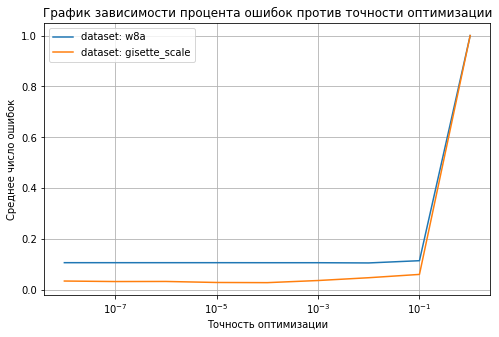

In [18]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(epsilons, error1, label='dataset: w8a')
ax.plot(epsilons, error2, label='dataset: gisette_scale')
ax.grid()

ax.set(
    xscale='log',
    xlabel='Точность оптимизации',
    ylabel='Среднее число ошибок',
    title='График зависимости процента ошибок против точности оптимизации'
);

ax.legend()
plt.savefig("exp3", bbox_inches="tight")